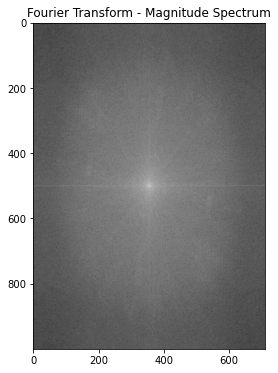

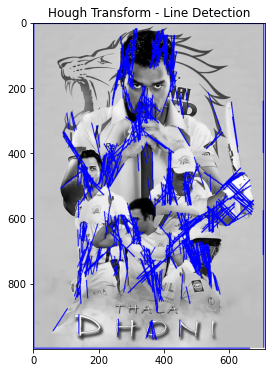

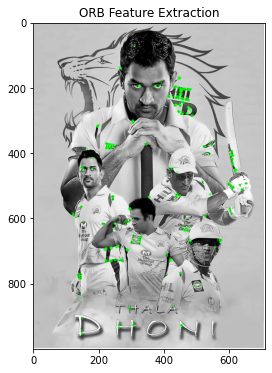

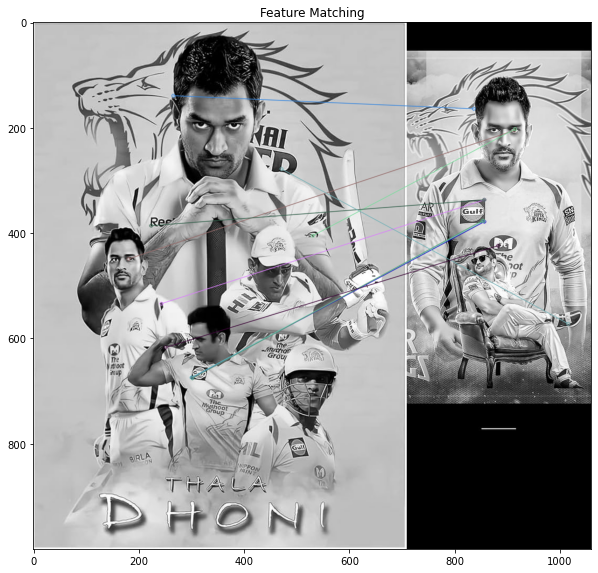

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread('csk.jpg', 0) 

f = np.fft.fft2(image) 
fshift = np.fft.fftshift(f) 
magnitude_spectrum = np.abs(fshift)

plt.figure(figsize=(6,6))
plt.imshow(np.log(magnitude_spectrum + 1), cmap='gray')
plt.title('Fourier Transform - Magnitude Spectrum')
plt.show()

edges = cv2.Canny(image, 50, 150, apertureSize=3)
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=50, maxLineGap=10)

image_with_lines = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(image_with_lines, (x1, y1), (x2, y2), (0, 0, 255), 2)

plt.figure(figsize=(6,6))
plt.imshow(image_with_lines)
plt.title('Hough Transform - Line Detection')
plt.show()

orb = cv2.ORB_create()
keypoints, descriptors = orb.detectAndCompute(image, None)

image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, color=(0,255,0), flags=0)

plt.figure(figsize=(6,6))
plt.imshow(image_with_keypoints)
plt.title('ORB Feature Extraction')
plt.show()

image2 = cv2.imread('dhoni.jpg', 0)

keypoints2, descriptors2 = orb.detectAndCompute(image2, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descriptors, descriptors2)

matches = sorted(matches, key=lambda x: x.distance)
image_matches = cv2.drawMatches(image, keypoints, image2, keypoints2, matches[:10], None, flags=2)

plt.figure(figsize=(10,10))
plt.imshow(image_matches)
plt.title('Feature Matching')
plt.show()



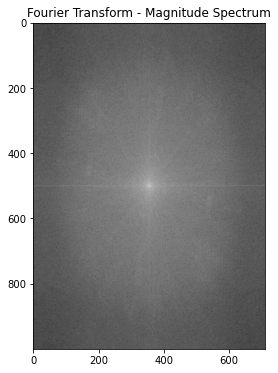

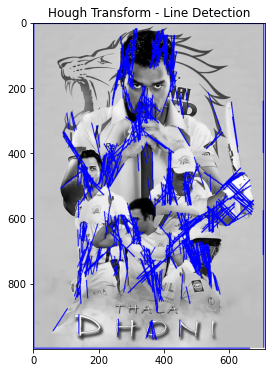

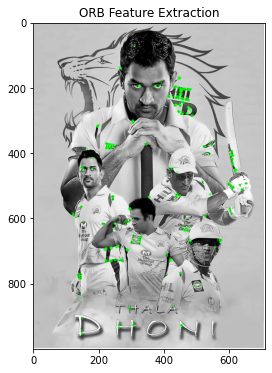

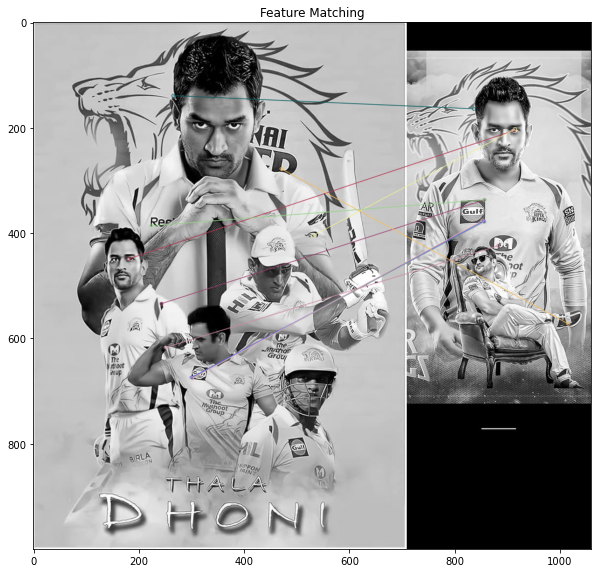

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread('csk.jpg', 0)  


if image is None:
    print("Error: Image not found or unable to load")
else:
    
    f = np.fft.fft2(image)  
    fshift = np.fft.fftshift(f)  
    magnitude_spectrum = np.abs(fshift)

   
    plt.figure(figsize=(6,6))
    plt.imshow(np.log(magnitude_spectrum + 1), cmap='gray')
    plt.title('Fourier Transform - Magnitude Spectrum')
    plt.show()

  
    edges = cv2.Canny(image, 50, 150, apertureSize=3)
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=50, maxLineGap=10)

    # Draw lines
    image_with_lines = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(image_with_lines, (x1, y1), (x2, y2), (0, 0, 255), 2)

    plt.figure(figsize=(6,6))
    plt.imshow(image_with_lines)
    plt.title('Hough Transform - Line Detection')
    plt.show()

    
    orb = cv2.ORB_create()
    keypoints, descriptors = orb.detectAndCompute(image, None)

    # Draw keypoints
    image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, color=(0,255,0), flags=0)

    plt.figure(figsize=(6,6))
    plt.imshow(image_with_keypoints)
    plt.title('ORB Feature Extraction')
    plt.show()

  
    image2 = cv2.imread('dhoni.jpg', 0)

    # Detect and compute keypoints for both images
    keypoints2, descriptors2 = orb.detectAndCompute(image2, None)

    # Match the descriptors using the Brute-Force Matcher
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(descriptors, descriptors2)

    # Sort the matches based on distance
    matches = sorted(matches, key=lambda x: x.distance)

    # Draw the matches
    image_matches = cv2.drawMatches(image, keypoints, image2, keypoints2, matches[:10], None, flags=2)

    plt.figure(figsize=(10,10))
    plt.imshow(image_matches)
    plt.title('Feature Matching')
    plt.show()


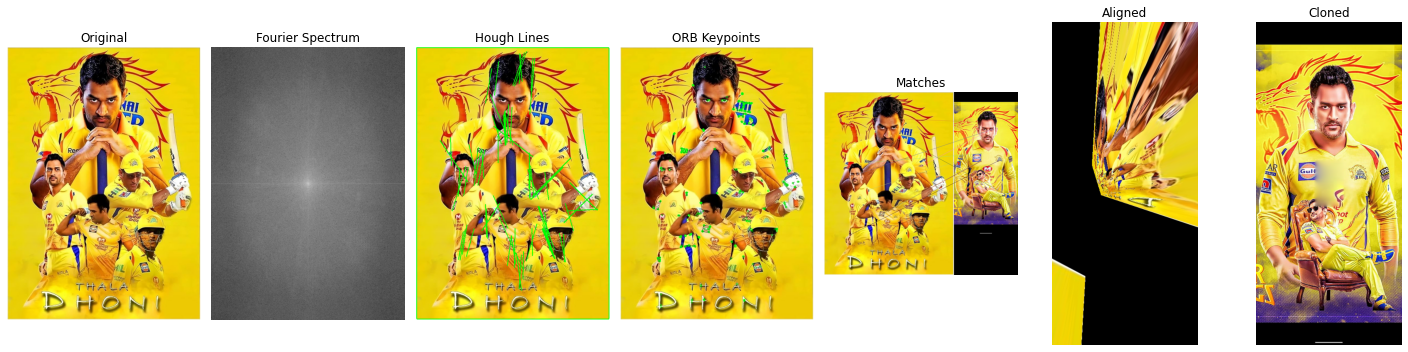

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_image(path):
    img = cv2.imread(path)
    if img is None:
        exit(f"Error: Image '{path}' not found!")
    return img

# Load images
image_path_1 = "csk.jpg" 
image_path_2 = "dhoni.jpg"  
image, image2 = load_image(image_path_1), load_image(image_path_2)

# Fourier Transform
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
fshift = np.fft.fftshift(np.fft.fft2(gray))
log_spectrum = np.log(np.abs(fshift) + 1)

# Hough Lines
edges = cv2.Canny(image, 50, 150)
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 100, minLineLength=100, maxLineGap=10)
line_image = image.copy()
if lines is not None: 
    for line in lines:
        cv2.line(line_image, tuple(line[0][:2]), tuple(line[0][2:]), (0, 255, 0), 2)

# ORB Feature Extraction
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(gray, None)
kp2, des2 = orb.detectAndCompute(cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY), None)

# Feature Matching
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = sorted(bf.match(des1, des2), key=lambda x: x.distance)[:10]
match_image = cv2.drawMatches(image, kp1, image2, kp2, matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Image Alignment
if len(matches) >= 4:  # Ensure there are enough matches to compute homography
    src_pts = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)
    H, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    if H is not None:
        aligned_image = cv2.warpPerspective(image, H, (image2.shape[1], image2.shape[0]))
    else:
        aligned_image = None
else:
    aligned_image = None

# Cloning
mask = np.zeros_like(gray)
cv2.fillPoly(mask, [np.array([[50, 50], [200, 50], [200, 200], [50, 200]])], 255)

# Ensure mask shape is the same as image2
mask_resized = cv2.resize(mask, (image2.shape[1], image2.shape[0]))
cloned_image = cv2.seamlessClone(image, image2, mask_resized, (image2.shape[1] // 2, image2.shape[0] // 2), cv2.NORMAL_CLONE)

# Display results
titles = ["Original", "Fourier Spectrum", "Hough Lines", "ORB Keypoints", "Matches", "Aligned", "Cloned"]
images = [image, log_spectrum, line_image, cv2.drawKeypoints(image, kp1, None, color=(0, 255, 0)),
          match_image, aligned_image, cloned_image]
valid_images = [(img, title) for img, title in zip(images, titles) if img is not None]

fig, axs = plt.subplots(1, len(valid_images), figsize=(20, 5))
for ax, (img, title) in zip(axs, valid_images):
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB) if len(img.shape) == 3 else img, cmap="gray")
    ax.set_title(title)
    ax.axis("off")
plt.tight_layout()
plt.show()
